In [11]:
# importing libraries

%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [12]:
# importing Libraries
data = pd.read_csv('F:\\ML\\datasets\\xclara.csv', names =['Temperature Difference',
                                    'Pressure Difference'] )
data = pd.DataFrame(data[1:])
print(data.shape)
data.head()

(3000, 2)


,Temperature Difference,Pressure Difference
1,2.072345,-3.241693
2,17.93671,15.78481
3,1.083576,7.319176
4,11.12067,14.40678
5,23.71155,2.557729


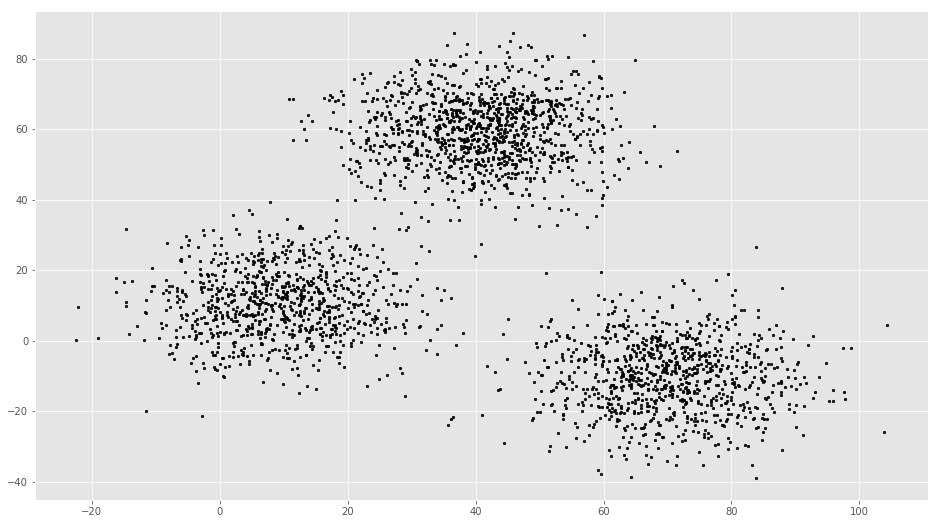

In [13]:
# geting the values and plotting it
f1 = data['Temperature Difference'].values
f2 = data['Pressure Difference'].values
X = np.array(list(zip(f1,f2)))
# becasuse f1,f2,X types are not float, so turn it into float with " matrix = np.array(matrix, dtype = 'float_')
f1 = np.array(f1, dtype='float_')
f2 = np.array(f2, dtype='float_')
X=np.array(X,dtype = 'float_')

# plotting
plt.scatter(f1,f2, c='black',s=7)

In [14]:
# Euclidean Distance Caculator
def dist(a,b,ax=1):
    return np.linalg.norm(a - b, axis =ax)

In [15]:
# Number of clusters
k = 3

# X coordinates of random centroids
C_x = np.random.randint(0,np.max(X)-20, size=k)

# Y coordinates of random centroids
C_y = np.random.randint(0,np.max(X)-20, size = k)
C = np.array(list(zip(C_x,C_y)),dtype = np.float32)
print(C)


[[ 5. 64.]
 [14. 69.]
 [52. 36.]]


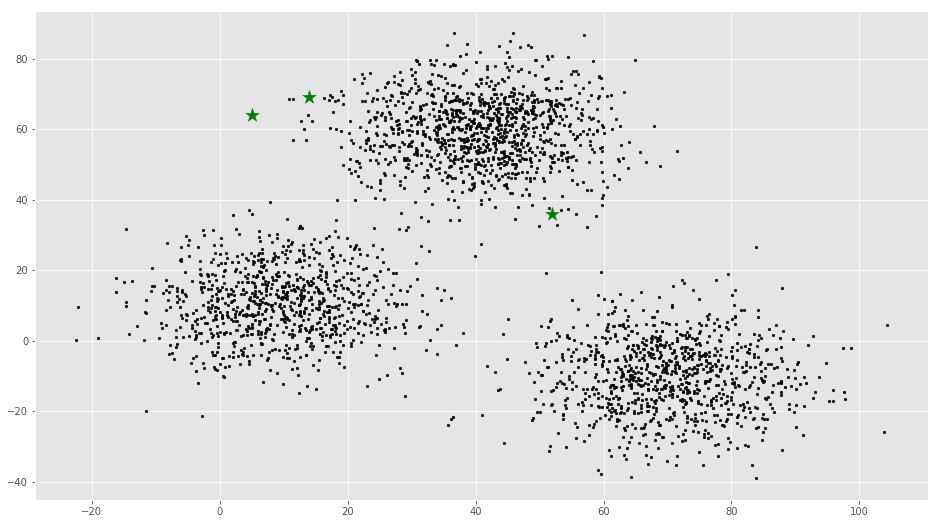

In [16]:
# plotting along with the centroids
plt.scatter(f1,f2, c='#050505',s=7)
plt.scatter(C_x, C_y, marker = '*',s=200, c='g')


2

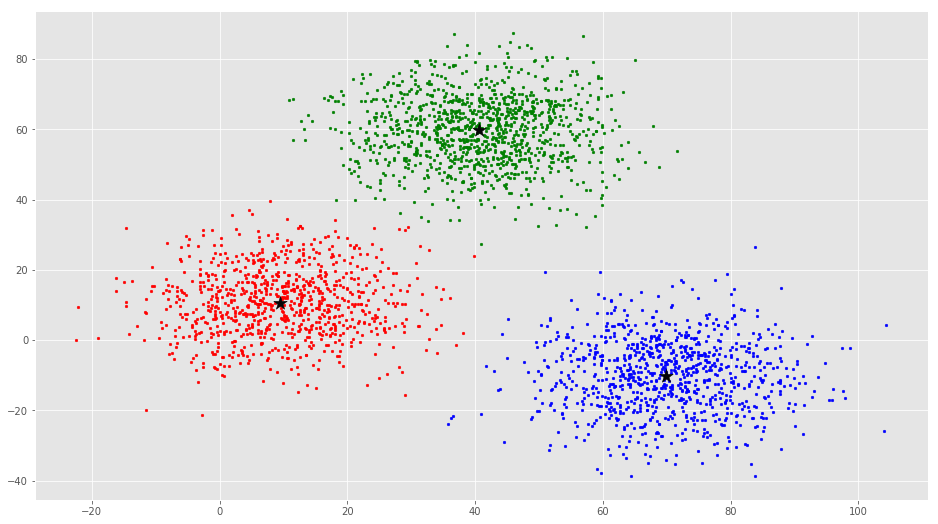

In [36]:
# to store the value of centroids when it updates
C_old = np.zeros(C.shape)

#Cluster labels(0,1,2)
clusters = np.zeros(len(X))

# Error func. -distance between new centroids and old centroids
error = dist(C,C_old,None)

# Loop will run till the error becomes zero
while error != 0:
    
    # assigining each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i],C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
        # storing the old centroid values
    C_old = deepcopy(C)
    
    # finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points,axis=0)
        error = dist(C, C_old, None)
        
    colors = ['r','g','b','y','c','m']
    fig, ax = plt.subplots()
    
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:,0],points[:,1],s=7, c=colors[i])
    ax.scatter(C[:,0],C[:,1],marker='*', s=200, c='#050505')
        